# Climate Change TimeSeries Analysis

By: Ing. Martin Farfan

https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data

The main objective of this code is to check a time series analysis for temperature change over time, and forecast the temperature to evaluate the model. 

# 1. IMPORT LIBRARIES

In [1]:
# DATA PROCESSING
import pandas as pd # data processing
import numpy as np
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns #Python library for Visualization

# 2. READ THE DATA

In [2]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('berkeleyearth/climate-change-earth-surface-temperature-data',
                                  path='./Data',
                                  unzip=False)

Dataset URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data


Read from the ZIP File

In [4]:
import zipfile
import io

# Leer desde el zip sin extraer
with zipfile.ZipFile('./Data/climate-change-earth-surface-temperature-data.zip', 'r') as z:
    # Ver qué archivos hay
    print("Archivos en el zip:", z.namelist())

    # Leer directamente desde el zip
    with z.open('GlobalTemperatures.csv') as f:
        gt_df = pd.read_csv(f)

Archivos en el zip: ['GlobalLandTemperaturesByCity.csv', 'GlobalLandTemperaturesByCountry.csv', 'GlobalLandTemperaturesByMajorCity.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalTemperatures.csv']


In [5]:
gt_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
gt_df.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [8]:
gt_df.count()

dt                                           3192
LandAverageTemperature                       3180
LandAverageTemperatureUncertainty            3180
LandMaxTemperature                           1992
LandMaxTemperatureUncertainty                1992
LandMinTemperature                           1992
LandMinTemperatureUncertainty                1992
LandAndOceanAverageTemperature               1992
LandAndOceanAverageTemperatureUncertainty    1992
dtype: int64

# 3. CLEANING THE RAW DATASET

## 3.1 Handling Missing Values

In [7]:
# Check for missing values
missing_values = gt_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


In [19]:
gt_df[gt_df.LandAndOceanAverageTemperature.notna()]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [20]:
gt_df[gt_df.LandAverageTemperature.isnull()]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
10,1750-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1751-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1751-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1751-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1751-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1751-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1752-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1752-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1752-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1752-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.2 Cleaning the Dataset

Since we want to analyze land average temperature, we only take the 3 first columns

In [24]:
temp1 = gt_df.iloc[33:, 0:3]

In [26]:
# Check for missing values
missing_values = temp1.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
dt                                   0
LandAverageTemperature               0
LandAverageTemperatureUncertainty    0
dtype: int64


In [25]:
temp1.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
33,1752-10-01,7.839,2.754
34,1752-11-01,7.335,2.747
35,1752-12-01,5.086,2.982
36,1753-01-01,2.039,3.478
37,1753-02-01,0.715,6.341


In [27]:
temp1['date'] = pd.to_datetime(temp1['dt'])
temp1 = temp1.sort_values("date").set_index("date")

In [29]:
temp1 = temp1.drop(columns=['dt'])

In [30]:
temp1.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty
date,,
1752-10-01,7.839,2.754
1752-11-01,7.335,2.747
1752-12-01,5.086,2.982
1753-01-01,2.039,3.478
1753-02-01,0.715,6.341


# 4. EXPLORATORY DATA ANALYSIS

## 4.1 Understand Column Meaning

In [31]:
temp1.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty
count,3159.000000,3159.000000
mean,8.377803,0.926390
std,4.378687,1.088716
min,-2.080000,0.034000
25%,4.318500,0.186000
50%,8.618000,0.386000
75%,12.548500,1.388500
max,19.021000,7.880000


## 4.2 Visualize Distributions

### 4.2.1 Basic Exploration

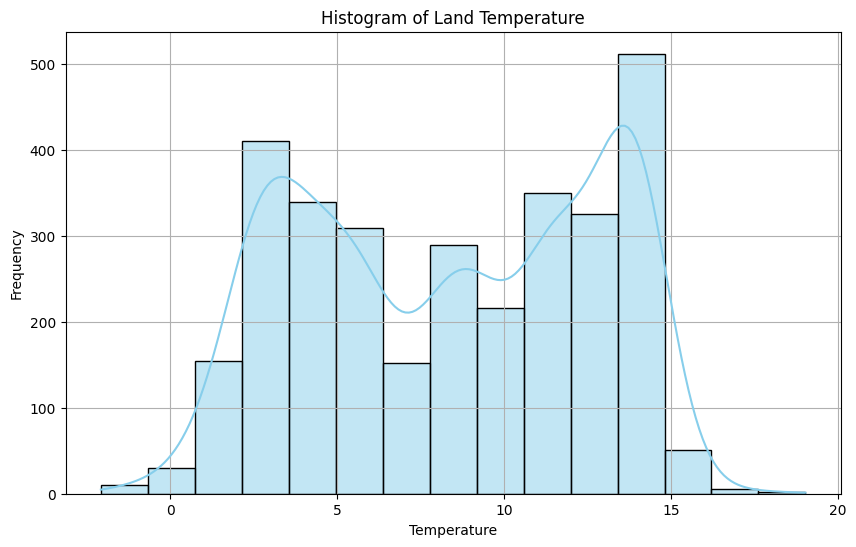

In [33]:
# histograms
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
sns.histplot(temp1['LandAverageTemperature'], 
            bins=15, #cuantas columnas
            color='skyblue', edgecolor='black', kde = True
            )
#plt.xscale('log')
plt.title('Histogram of Land Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

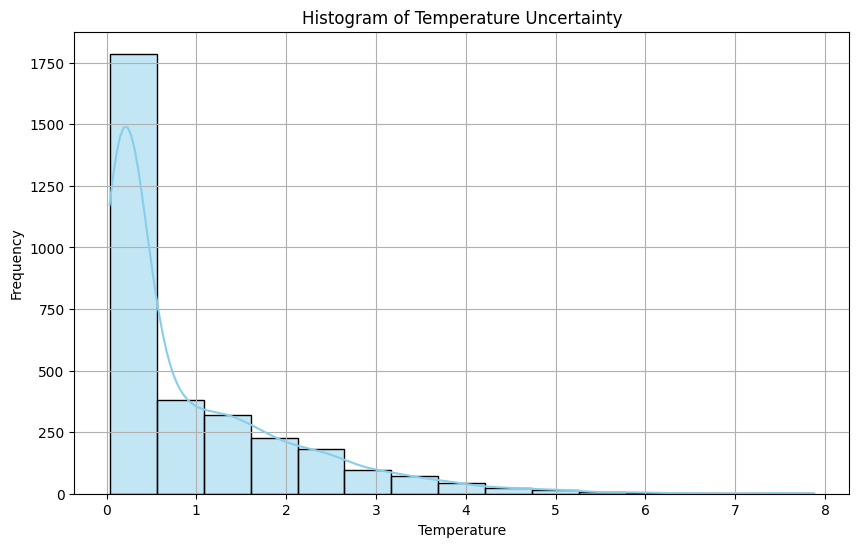

In [35]:
# histograms
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
sns.histplot(temp1['LandAverageTemperatureUncertainty'], 
            bins=15, #cuantas columnas
            color='skyblue', edgecolor='black', kde = True
            )
#plt.xscale('log')
plt.title('Histogram of Temperature Uncertainty')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

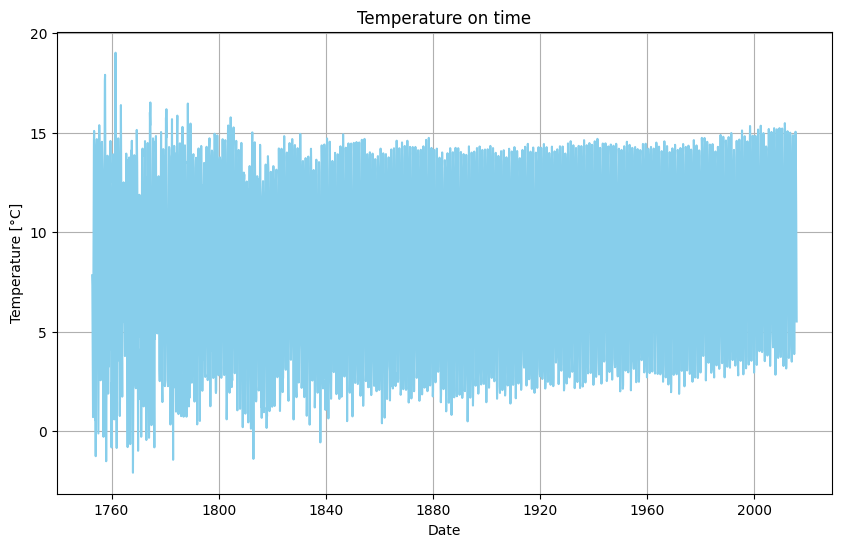

In [54]:
# plot
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
plt.plot(temp1.index,temp1['LandAverageTemperature'], 
            color='skyblue')
plt.title('Temperature on time')
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

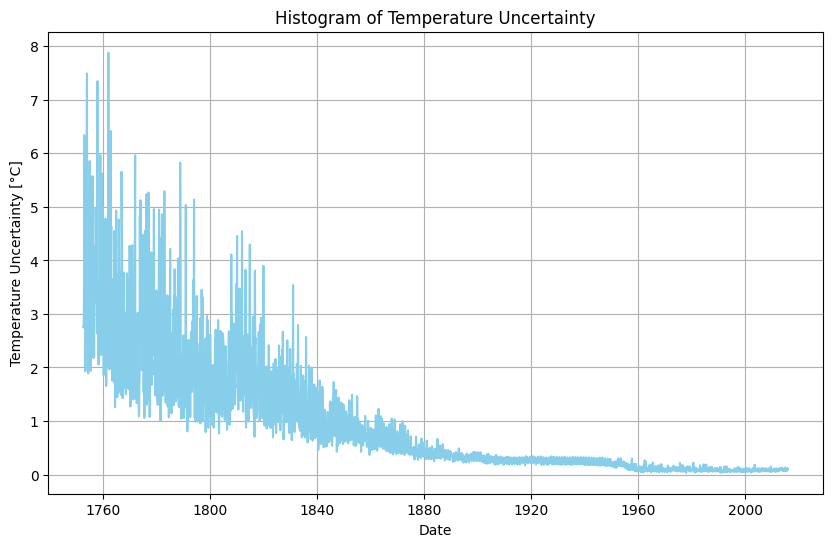

In [ ]:
# plot
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
plt.plot(temp1.index,temp1['LandAverageTemperatureUncertainty'], 
            color='skyblue')
plt.title('Uncertainty on Time')
plt.xlabel('Date')
plt.ylabel('Temperature Uncertainty [°C]')
plt.grid(True)
plt.show()

As it is is evident, from 1900 on forward the uncertainty decreases into levels wich are aceptables for ok measurments

### 4.2.2 Exploration between Variables

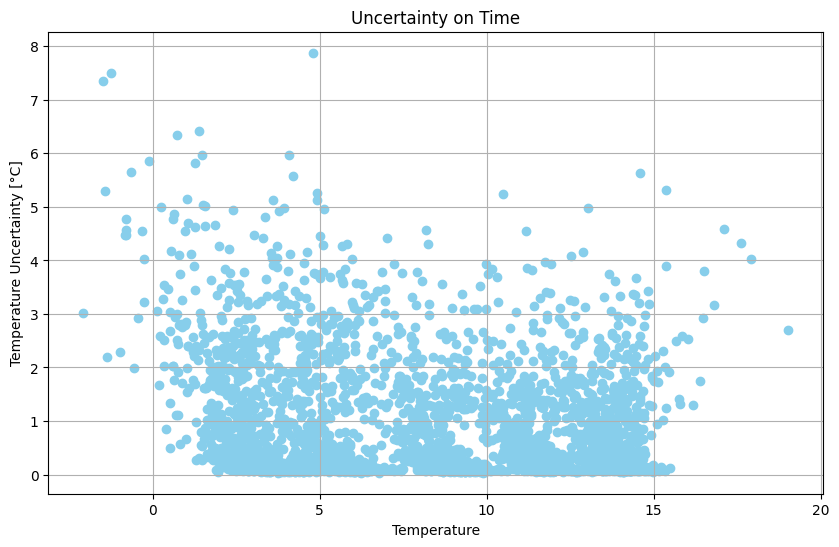

In [51]:
# plot
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
plt.scatter(temp1['LandAverageTemperature'],
            temp1['LandAverageTemperatureUncertainty'], 
            color='skyblue')
plt.title('Uncertainty on Time')
plt.xlabel('Temperature')
plt.ylabel('Temperature Uncertainty [°C]')
plt.grid(True)
plt.show()

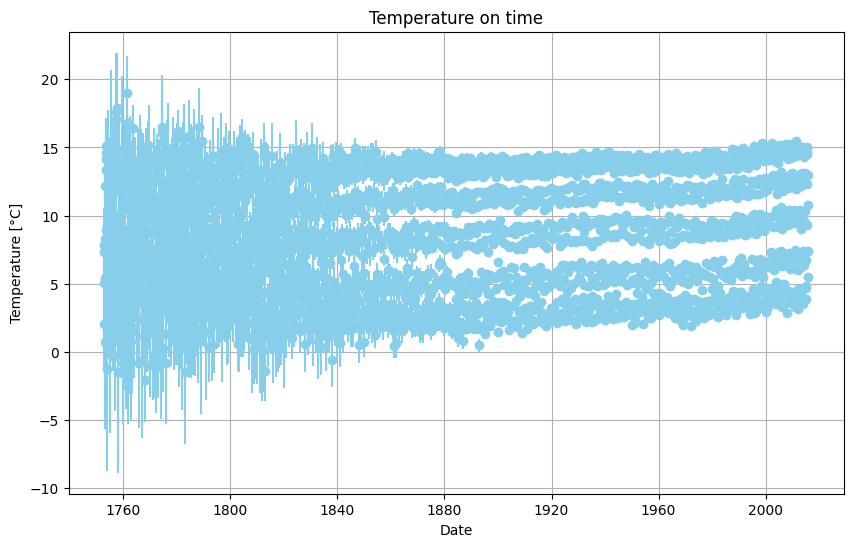

In [53]:
# plot
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
plt.errorbar(x=temp1.index,
             y=temp1['LandAverageTemperature'], 
             yerr= temp1['LandAverageTemperatureUncertainty'],
             color='skyblue',
             fmt='o')
plt.title('Temperature on time')
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

Let's reduce the dataset to 1900 on forward.

In [59]:
temp_red = temp1.loc['1900-01-01':]
temp_red

,LandAverageTemperature,LandAverageTemperatureUncertainty
date,,
1900-01-01,1.461,0.276
1900-02-01,3.098,0.416
1900-03-01,5.492,0.261
1900-04-01,8.223,0.292
1900-05-01,11.385,0.357
...,...,...
2015-08-01,14.755,0.072
2015-09-01,12.999,0.079
2015-10-01,10.801,0.102


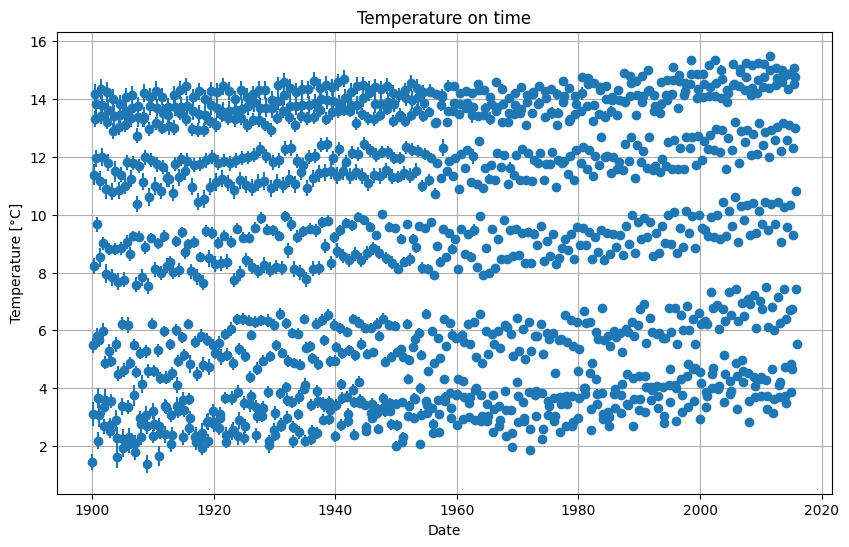

In [ ]:
# plot
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
plt.errorbar(x=temp_red.index,
             y=temp_red['LandAverageTemperature'], 
             yerr= temp_red['LandAverageTemperatureUncertainty'],
             #color=Let's try to do a STL Decomposition! To check Seasonality'skyblue',
             fmt='o')
plt.title('Temperature on time')
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

Let's try to do a STL Decomposition! To check Seasonality

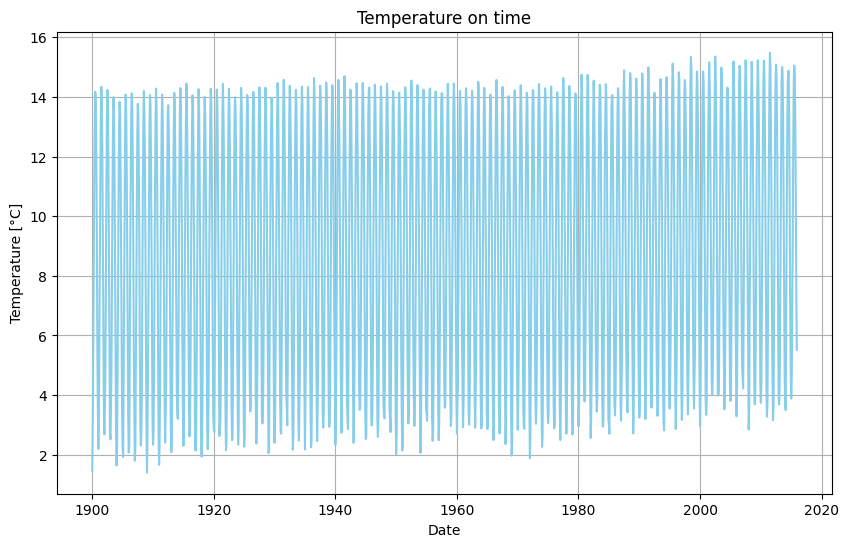

In [67]:
# plot
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
plt.plot(temp_red.index,
         temp_red['LandAverageTemperature'], 
             color='skyblue')
plt.title('Temperature on time')
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2848\825866451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_red["trend"] = res.trend
C:\Users\USER\AppData\Local\Temp\ipykernel_2848\825866451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_red["seasonal"] = res.seasonal
C:\Users\USER\AppData\Local\Temp\ipykernel_2848\825866451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

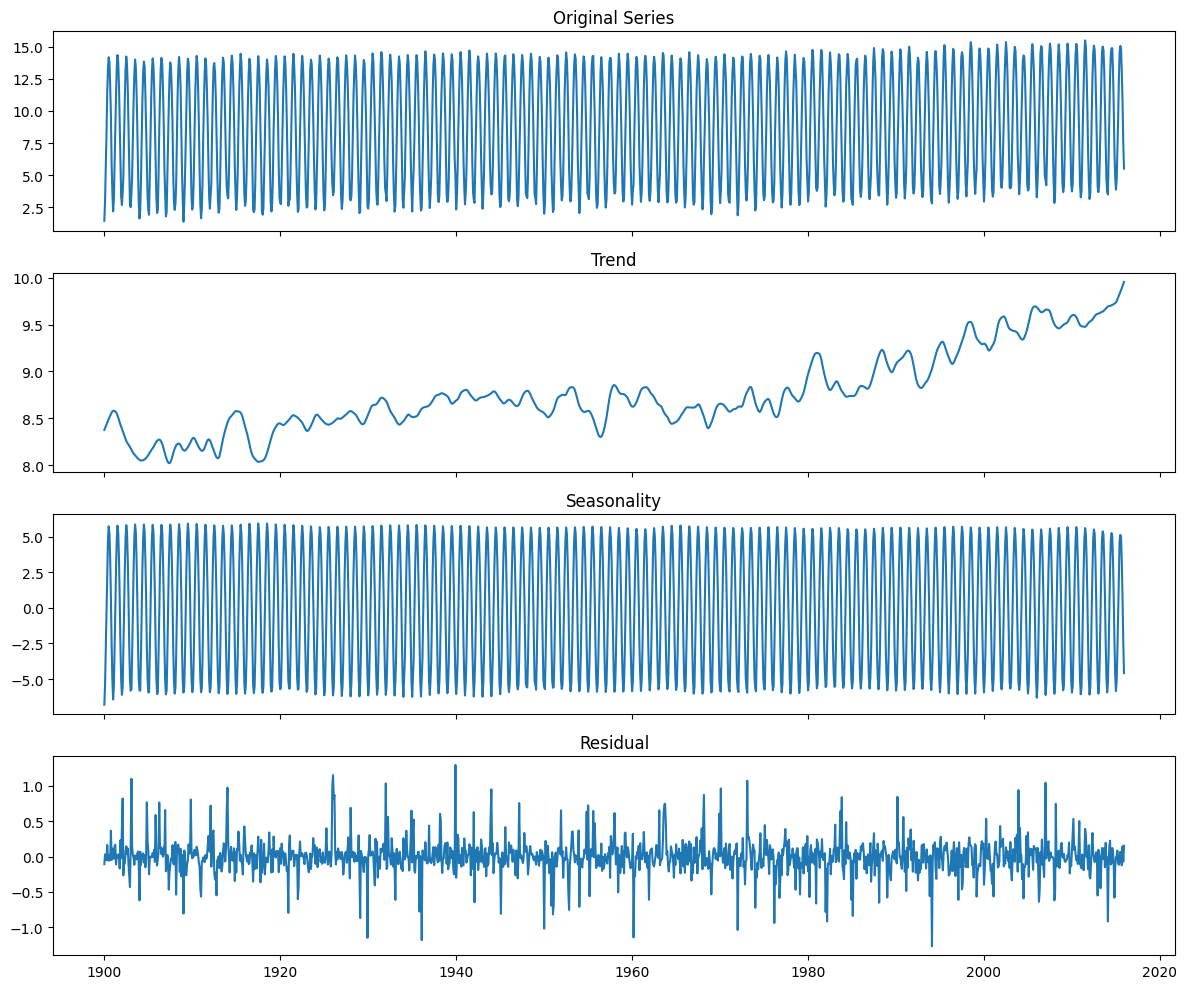

In [70]:
from statsmodels.tsa.seasonal import STL

stl = STL(temp_red['LandAverageTemperature'], period=12, robust=True)
res = stl.fit()

temp_red["trend"] = res.trend
temp_red["seasonal"] = res.seasonal
temp_red["resid"] = res.resid

fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(temp_red.index, temp_red["LandAverageTemperature"])
axes[0].set_title("Original Series")

axes[1].plot(temp_red.index, temp_red["trend"])
axes[1].set_title("Trend")

axes[2].plot(temp_red.index, temp_red["seasonal"])
axes[2].set_title("Seasonality")

axes[3].plot(temp_red.index, temp_red["resid"])
axes[3].set_title("Residual")

plt.tight_layout()
plt.show()

- There is a positive tendency on the Trend plot, showing that indeed the temperatures are rising. 
- As it can be seen, there are anomalies present on any year, these are the residuals.

In [73]:
temp_red["month"] = temp_red.index.month
monthly_mean = temp_red.groupby("month")["LandAverageTemperature"].mean()
monthly_mean

C:\Users\USER\AppData\Local\Temp\ipykernel_2848\1749017582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_red["month"] = temp_red.index.month


month
1      2.815034
2      3.330681
3      5.395672
4      8.536759
5     11.394819
6     13.540052
7     14.449052
8     13.958491
9     12.166733
10     9.527078
11     6.223164
12     3.811914
Name: LandAverageTemperature, dtype: float64

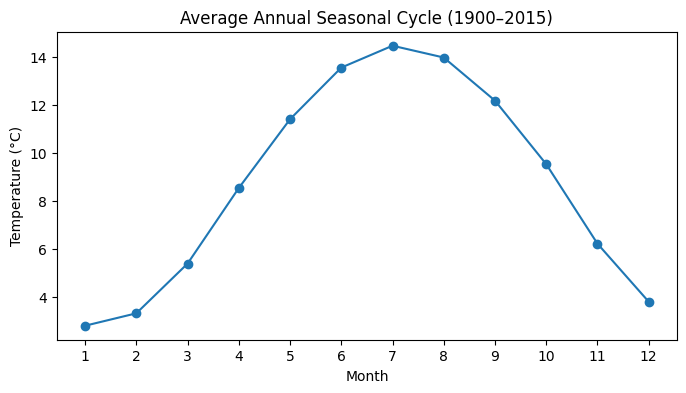

In [74]:
plt.figure(figsize=(8,4))
monthly_mean.plot(marker="o")
plt.title("Average Annual Seasonal Cycle (1900–2015)")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(range(1,13))
plt.show()

# 5. PREPROCESSING BEFORE MODELLING

## 5.0 Creating the Dataset for inputing into the model

In [75]:
X_raw = temp_red[['LandAverageTemperature']]
X_raw

,LandAverageTemperature
date,
1900-01-01,1.461
1900-02-01,3.098
1900-03-01,5.492
1900-04-01,8.223
1900-05-01,11.385
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [80]:
# Need to create the data for the RNN(LSTM)
def create_data(x, len_seq):
    X, y = [], []
    for i in range(len(x) - len_seq):
        X.append(x[i:i+len_seq])
        y.append(x[i+len_seq])
    return np.array(X), np.array(y)

In [97]:
lenght = 24
X, y = create_data(X_raw.LandAverageTemperature, lenght)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

print(X.shape)
print(y.shape)

(1368, 24, 1)
(1368,)


C:\Users\USER\AppData\Local\Temp\ipykernel_2848\2451034296.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(x[i+len_seq])


In [94]:
print(y)

[ 2.684  3.606  4.883 ... 10.801  7.433  5.518]


## 5.1 Encoding Categorical Features

## 5.2 Divide into Train and Test Set

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [99]:
y_train

array([2.684, 3.606, 4.883, ..., 4.075, 3.301, 3.745], shape=(1094,))

## 5.3 Scaling Numerical Features

In [100]:
from sklearn.preprocessing import StandardScaler

# Standardize the data X
scaler_X = StandardScaler()
# first, we need to fit the scaler with the train dataset
scaler_X.fit(X_train.reshape(-1,1))
X_train_scaled = scaler_X.transform(X_train.reshape(-1,1))
X_test_scaled = scaler_X.transform(X_test.reshape(-1,1))

# Standardize the data X
scaler_y = StandardScaler()
# first, we need to fit the scaler with the train dataset
scaler_y.fit(y_train.reshape(-1,1))
y_train_scaled = scaler_y.transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

In [170]:
from sklearn.preprocessing import MinMaxScaler

# 1. Usar MinMaxScaler suele ayudar a las LSTM con los picos
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Ajustar y transformar
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler_X.transform(X_test.reshape(-1, 1))

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# IMPORTANTE: Para recuperar los valores reales después de predecir:
# y_pred_inv = scaler_y.inverse_transform(y_pred)

In [101]:
X_train_scaled

array([[-1.69973599],
       [-1.30970848],
       [-0.73932004],
       ...,
       [-0.64473182],
       [-1.07693091],
       [-1.26134221]], shape=(26256, 1))

# 6. MODELLING

## Model: LTSM

### 6.1 Construct the Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [183]:
# Create the RNN model
model = keras.Sequential()
model.add(LSTM(units=64, return_sequences=True, 
               activation='tanh',
               input_shape=(lenght, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=False, 
               activation='tanh',
               input_shape=(lenght, 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))

In [184]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Ver resumen del modelo
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Crear callback de early stopping
early_stop = EarlyStopping(
    monitor='val_loss',        # Métrica a monitorear
    patience=10,              # Espera 10 epochs sin mejora antes de parar
    restore_best_weights=True, # Restaura los mejores pesos
    mode='min'                # Queremos minimizar la pérdida
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    verbose=1,
    shuffle=False,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.0055 - mae: 0.7780 - val_loss: 0.3724 - val_mae: 0.4887
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0055 - mae: 0.7899 - val_loss: 0.3008 - val_mae: 0.4408
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.9795 - mae: 0.7792 - val_loss: 0.2985 - val_mae: 0.4368
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9991 - mae: 0.7915 - val_loss: 0.2682 - val_mae: 0.4075
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.0064 - mae: 0.7823 - val_loss: 0.3005 - val_mae: 0.4384
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.0333 - mae: 0.7909 - val_loss: 0.2585 - val_mae: 0.3945
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.0515 - mae: 0.8028 - val_loss: 0.3256 - val_mae: 0.4618
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.0741 - mae: 0.8047 - val_loss: 0.2578 - val_mae: 0.3989
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9838 - mae: 

### 6.2 Evaluate the Model

In [187]:
y_pred = model.predict(X_test, verbose=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [188]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse.__round__(2))
print("Mean Absolute Error:", mae.__round__(2))
print("R-squared:", r2.__round__(2))

Mean Squared Error: 0.75
Mean Absolute Error: 0.73
R-squared: 0.96


In [189]:
# Aplanar los arrays para calcular métricas (por si tienen forma (n, 1))
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

maef = mean_absolute_error(y_test_flat, y_pred_flat)
msef = mean_squared_error(y_test_flat, y_pred_flat)
r2f = r2_score(y_test_flat, y_pred_flat)

print("Mean Squared Error:", msef.__round__(2))
print("Mean Absolute Error:", maef.__round__(2))
print("R-squared:", r2f.__round__(2))

Mean Squared Error: 0.75
Mean Absolute Error: 0.73
R-squared: 0.96


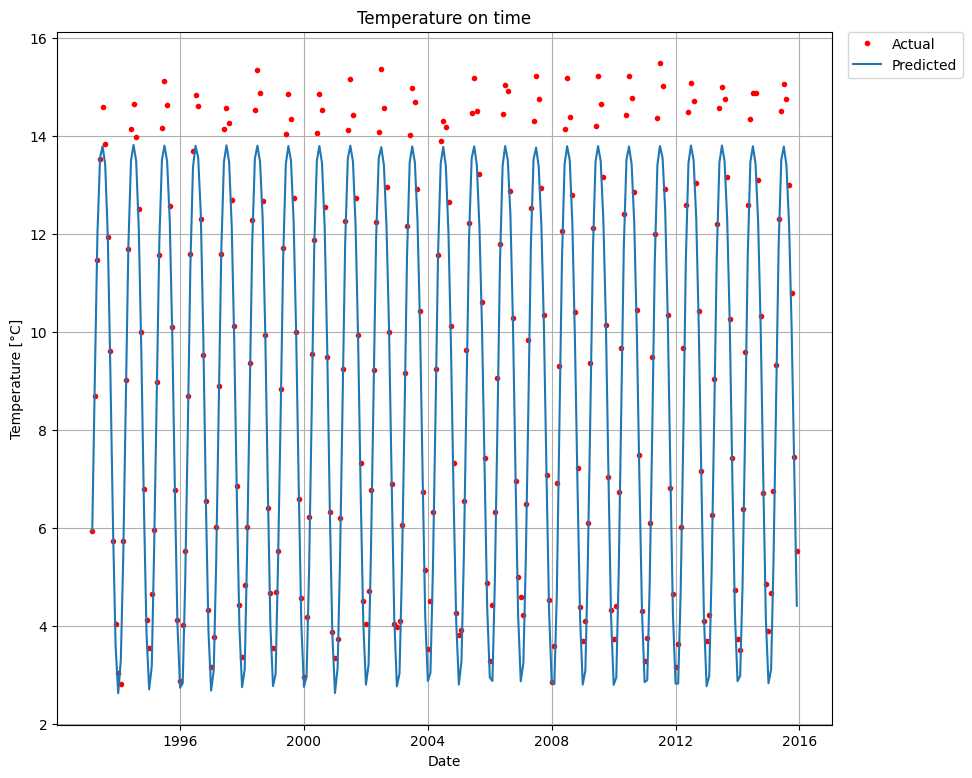

In [190]:
dates = X_raw.index[-len(y_test):]  # Latest dates corresponding to tests

plt.figure(figsize=(10,9))
plt.plot(dates, y_test, marker='.', linestyle='None', color='red', label='Actual')  
plt.plot(dates, y_pred, label='Predicted')  
plt.title('Temperature on time')
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)
plt.grid(True)
plt.show()

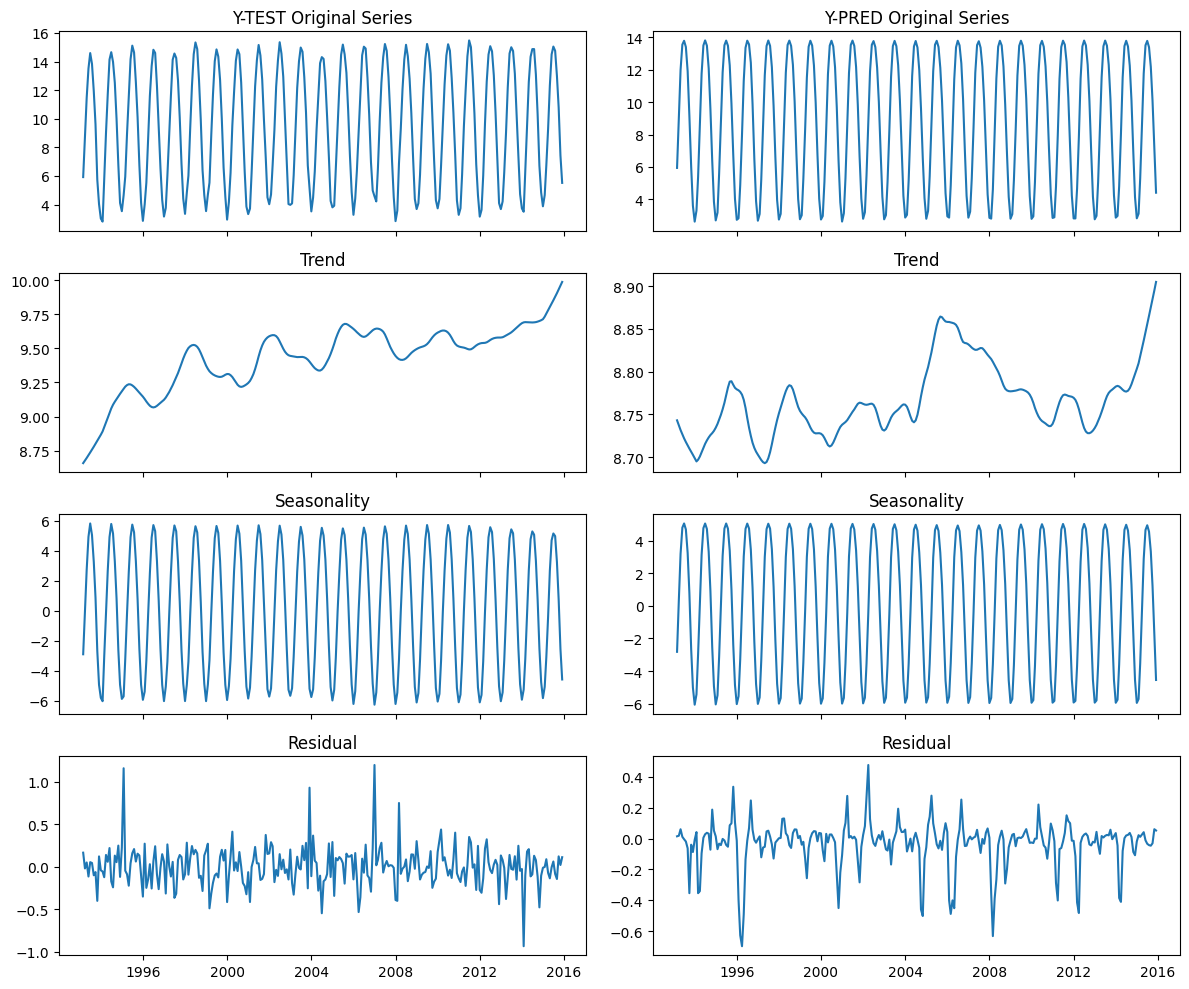

In [191]:
from statsmodels.tsa.seasonal import STL

## Y-test
stl = STL(y_test, period=12, robust=True)
res = stl.fit()

fig, axes = plt.subplots(4, 2, figsize=(12, 10), sharex=True)

axes[0, 0].plot(dates, y_test)
axes[0, 0].set_title("Y-TEST Original Series")
axes[1, 0].plot(dates, res.trend)
axes[1, 0].set_title("Trend")   
axes[2, 0].plot(dates, res.seasonal)
axes[2, 0].set_title("Seasonality")
axes[3, 0].plot(dates, res.resid)
axes[3, 0].set_title("Residual")


## Y-pred
stl1 = STL(y_pred, period=12, robust=True)
res1 = stl1.fit()

axes[0, 1].plot(dates, y_pred)
axes[0, 1].set_title("Y-PRED Original Series")
axes[1, 1].plot(dates, res1.trend)
axes[1, 1].set_title("Trend")   
axes[2, 1].plot(dates, res1.seasonal)
axes[2, 1].set_title("Seasonality")
axes[3, 1].plot(dates, res1.resid)
axes[3, 1].set_title("Residual")

plt.tight_layout()
plt.show()

# 7. CONCLUSSIONS AND ERASE THE DATASET

- The neural network successfully captures the strong seasonal structure of the temperature time series, reproducing its amplitude, frequency, and phase with high accuracy.
- The model learns the underlying long-term trend of the series, although in a smoother form compared to the observed data, indicating a focus on structural patterns rather than local fluctuations.
- The model is "averaging" the behaviour and is not complex enough (or lacks training periods) to capture the full range of the series. It is being too conservative. This can be seen in the graph comparing the predicted temperatures with the test ones, where the pattern is being identified, but not the extreme values.

In [130]:
# Erase the zip
import os
os.remove('./Data/climate-change-earth-surface-temperature-data.zip')